# 

# Author: Rahim Kamara
# Date: July 25, 2022
# AOSC498, UMDCP

## Importing the Libraries

In [5]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units

## Importing the Data

### June 29 2021 at 00Z

In [6]:
date = datetime(2021, 6, 29, 0) # Year, month, day, time
station = 'IAD' # Three letter code 

In [7]:
from siphon.simplewebservice.wyoming import WyomingUpperAir # This is a module that allows me to request data

In [8]:
df = WyomingUpperAir.request_data(date, station)

In [9]:
df # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1012.0,93,32.0,21.0,165.0,6.0,-1.552914e+00,5.795555,IAD,72403,2021-06-29,38.98,-77.46,93.0,42.67
1,1000.0,196,30.4,19.4,170.0,8.0,-1.389185e+00,7.878462,IAD,72403,2021-06-29,38.98,-77.46,93.0,42.67
2,987.8,305,29.4,19.2,175.0,11.0,-9.587132e-01,10.958142,IAD,72403,2021-06-29,38.98,-77.46,93.0,42.67
3,954.4,610,26.6,18.6,180.0,14.0,-1.714506e-15,14.000000,IAD,72403,2021-06-29,38.98,-77.46,93.0,42.67
4,925.0,887,24.0,18.0,190.0,14.0,2.431074e+00,13.787309,IAD,72403,2021-06-29,38.98,-77.46,93.0,42.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,11.2,30785,-40.3,-82.3,55.0,28.0,-2.293626e+01,-16.060140,IAD,72403,2021-06-29,38.98,-77.46,93.0,42.67
98,10.1,31472,-40.3,-82.3,73.0,32.0,-3.060175e+01,-9.355895,IAD,72403,2021-06-29,38.98,-77.46,93.0,42.67
99,10.0,31540,-39.9,-81.9,75.0,32.0,-3.090963e+01,-8.282209,IAD,72403,2021-06-29,38.98,-77.46,93.0,42.67
100,9.3,32004,-36.8,-81.2,80.0,32.0,-3.151385e+01,-5.556742,IAD,72403,2021-06-29,38.98,-77.46,93.0,42.67


In [141]:
# df.loc[10]

In [10]:
df.units

{'pressure': 'hPa',
 'height': 'meter',
 'temperature': 'degC',
 'dewpoint': 'degC',
 'direction': 'degrees',
 'speed': 'knot',
 'u_wind': 'knot',
 'v_wind': 'knot',
 'station': None,
 'station_number': None,
 'time': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meter',
 'pw': 'millimeter'}

In [14]:
df.units['dewpoint'] # This example line allows us to know the units of dewpoint. It should return degC

'degC'

In [15]:
h = df['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P = df['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC = df['temperature'].values * units(df.units['temperature']) # This grabs the temperature array
Td_degC = df['dewpoint'].values * units(df.units['dewpoint']) # This grabs the dewpoint temperature array
u = df['u_wind'].values * units(df.units['u_wind']) # This grabs the wind x component array
v = df['v_wind'].values * units(df.units['v_wind']) # This grabs the wind y component array
lat = df['latitude'].values * units(df.units['latitude']) # This grabs the latitude array
lon = df['longitude'].values * units(df.units['longitude']) # This grabs the longitude array
hh # This prints the heights at which data was collected from the radiosonde

Magnitude,[ 93 196 305 610 887 914 1219 1440 1524 1620 1829 2134 2438 2743 2751 3048 3260 3307 3353 3658 3883 4267 4281 4572 4628 4877 4975 5145 5182 5970 6096 6401 7010 7223 7315 7620 7680 8101 8230 8839 8856 9144 9770 10249 10668 10834 11020 12198 12480 12802 14021 14159 14280 14326 14935 15240 15519 15617 16154 16360 16651 16710 16764 17069 17187 17374 17678 17983 18135 18288 18593 18870 19202 19507 19812 20215 20960 21024 21336 21946 22860 23165 23560 23774 24210 24689 24994 25298 26518 26860 27127 27432 28042 28346 29261 29749 30480 30785 31472 31540 32004 32114]
Units,meter


## Converting

In [16]:
T_kelvin = T_degC.to('kelvin') # This converts Celsius to Kelvin
Td_kelvin = Td_degC.to('kelvin') # This converts Celsius to Kelvin

In [17]:
Theta = mpcalc.potential_temperature(P, T_kelvin) # This line calculates the potential temperature in units of kelvin
RH = mpcalc.relative_humidity_from_dewpoint(T_kelvin, Td_kelvin)*100 # This line calculates the Relative Humidity
q = mpcalc.specific_humidity_from_dewpoint(P, Td_kelvin) # This line calculates the Specific Humidity
mr = mpcalc.mixing_ratio_from_specific_humidity(q) # This line calculates the Mixing Ratio
e = mpcalc.vapor_pressure(P, mr) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)
# Z = mpcalc.mixed_layer(P, h, height=None, bottom=None, depth=None, interpolate=True)
# LCL = mpcalc.lcl(P[0], T_degC[0], Td_degC[0], max_iters=50, eps=1e-05) # This gets the LCL, also known as the base of the cloud. The calcultion uses the starting pressure value, starting temperature value, and starting dew point
# LCL
# lcl_pressure, lcl_temperature = mpcalc.lcl(P[0], T_degC[0], Td_degC[0])


In [18]:
N = ((77.6)*(P/T_kelvin)).magnitude + ((3.73)*(10**5)*(e/(T_kelvin**2))).magnitude # There's a discrepancy between the units so I used '.magnitude'

In [19]:
#a = ((77.6)*(P/T_kelvin))

In [20]:
#b = ((3.73)*(10**5)*(e/(T_kelvin**2)))

In [21]:
#N = a.magnitude + b.magnitude

# Gradient coding for June 29 at 00Z

In [23]:
# np.gradient takes the form numpy.gradient(f, *varargs, axis=None, edge_order=1), where *varargs specifies the spacing between two points of the array. The default is set to 1, so we get the same number of point returned 

gradTheta = np.gradient(Theta[0:22]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta # This prints the gradient of the Potential Temperature array


# Once I have the gradients, I want to find the 10 largest gradients for Potential temperature

largestTheta = np.argsort(gradTheta)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array

# I then want to find the position of those 10 largest gradients. I can use the index function ORRRRR I can just print from the previous line above which I will do I think

largestTheta # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:22] range of atmosphere positions are 15, 9, 13, 18, 20, 21, 19, 10, 12, 11

#-----------------------------------------------------------------------------

gradRH = np.gradient(RH[0:22]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH # This prints the gradient of the Relative Humidity array

smallestRH = np.argsort(gradRH)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:22] range of atmosphere positions are 19, 18, 11, 10, 12, 9, 13, 8, 0, 14

#-----------------------------------------------------------------------------

gradq = np.gradient(q[0:22]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq # This prints the gradient of the Specific Humidity array


smallestq = np.argsort(gradq)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:22] range of atmosphere positions are 19, 0, 11, 10, 12, 18, 9, 1, 8, 13

#-----------------------------------------------------------------------------

gradN = np.gradient(N[0:22]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN # This prints the gradient of the Refractivity array

smallestN = np.argsort(gradN)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:22] range of atmosphere positions are 11, 10, 12, 19, 0, 9, 6, 18, 15, 3

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

#h[]

2134 <Unit('meter')>


## Gradient Richardson Number (GRN). Now that I have the Gradients and Height, use that instead of plotting the GRN because I am not entirely sure if I could even do unit conversion

In [153]:
GRN = mpcalc.gradient_richardson_number(h, Theta, u, v, vertical_dim=0) # This line gets the gradient values
GRN = GRN[np.logical_not(np.isnan(GRN))] # This line removes the values with Nan

GRN = np.amax(GRN) # This finds the max value of the Gradiant Richardson number
GRN # This line prints the value

GRN = np.ones(len(Theta))*GRN # This line puts the maximum GRN value into an array the length of theta
GRN = GRN * (units.second * units.second * units.knot * units.knot) / units.meter
#GRN_largest = np.argsort(GRN)[-10:]
#GRN_largest
GRN

Magnitude,[1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138 1891.7236983731138]
Units,meter


## Plotting for June 29, 2021 at 00Z

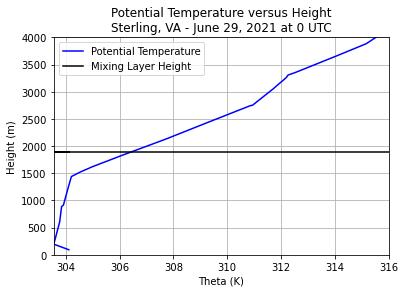

In [35]:
length = np.ones(len(Theta))*Theta

plt.plot(Theta,h, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(length, GRN, color='black', label='Mixing Layer Height')


#plt.plot()
#plt.axhline(GRN, color='black')

plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta),316)
plt.ylabel('Height (m)')
plt.ylim(0,4000)


plt.title('Potential Temperature versus Height\nSterling, VA - June 29, 2021 at 0 UTC')
plt.legend(loc=0) 
plt.grid(True) 
plt.savefig("0629202100ZPT.png")



In [ ]:
GRN = mpcalc.gradient_richardson_number(h, Theta, u, v, vertical_dim=0) # This line gets the gradient values
GRN = GRN[np.logical_not(np.isnan(GRN))] # This line removes the values with Nan

GRN = np.amax(GRN) # This finds the max value of the Gradiant Richardson number
GRN # This line prints the value

GRN = np.ones(len(Theta))*GRN # This line puts the maximum GRN value into an array the length of theta
GRN = GRN * (units.second * units.second * units.knot * units.knot) / units.meter
GRN

length = np.ones(len(RH))*RH

plt.plot(RH,h, c="red", label="RH")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(length, GRN, color='black', label='Mixing Layer height')

plt.xlabel('Relative Humidity (%)')
plt.xlim(40,np.amax(RH))
plt.ylabel('Height (m)')
plt.ylim(0,4000)


plt.legend(loc=0) 
plt.title('Relative Humidity versus Height\nSterling, VA - June 29, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0629202100ZRH.png")

In [ ]:
GRN = mpcalc.gradient_richardson_number(h, Theta, u, v, vertical_dim=0) # This line gets the gradient values
GRN = GRN[np.logical_not(np.isnan(GRN))] # This line removes the values with Nan

GRN = np.amax(GRN) # This finds the max value of the Gradiant Richardson number
GRN # This line prints the value

GRN = np.ones(len(q))*GRN # This line puts the maximum GRN value into an array the length of theta
GRN = GRN * (units.second * units.second * units.knot * units.knot) / units.meter
GRN

length = np.ones(len(q))*q

plt.plot(q,h, c="green", label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(length, GRN, color='black', label='Mixing Layer Height')


plt.xlabel('q (g/kg)')
plt.xlim(0.003,np.amax(q))
plt.ylabel('Height (m)')
plt.ylim(0,4000)

plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - June 29, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0629202100ZSH.png")

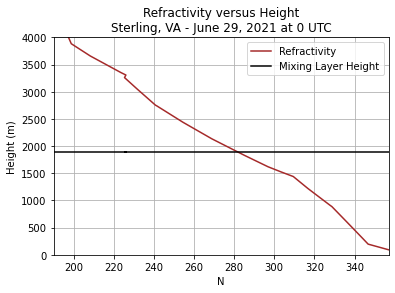

In [17]:
GRN = mpcalc.gradient_richardson_number(h, Theta, u, v, vertical_dim=0) # This line gets the gradient values
GRN = GRN[np.logical_not(np.isnan(GRN))] # This line removes the values with Nan

GRN = np.amax(GRN) # This finds the max value of the Gradiant Richardson number
GRN # This line prints the value

GRN = np.ones(len(N))*GRN # This line puts the maximum GRN value into an array the length of theta
GRN = GRN * (units.second * units.second * units.knot * units.knot) / units.meter
GRN

length = np.ones(len(N))*N

plt.plot(N,h, c="brown", label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(length, GRN, color='black', label='Mixing Layer Height')

plt.xlabel('N')
plt.xlim(190,np.amax(N))
plt.ylabel('Height (m)')
plt.ylim(0,4000)

plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - June 29, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0629202100ZR.png")

## Importing the Data

### June 29 2021 at 12Z

In [30]:
date29AT12Z = datetime(2021, 6, 29, 12) # Year, month, day, time
station = 'IAD' # Three letter code 

In [31]:
df1 = WyomingUpperAir.request_data(date29AT12Z, station)

In [32]:
df1 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1014.0,93,23.2,19.8,170.0,6.0,-1.041889,5.908847,IAD,72403,2021-06-29 12:00:00,38.98,-77.46,93.0,32.26
1,1000.0,213,22.6,19.6,195.0,7.0,1.811733,6.761481,IAD,72403,2021-06-29 12:00:00,38.98,-77.46,93.0,32.26
2,998.0,230,22.4,19.5,198.0,7.0,2.163119,6.657396,IAD,72403,2021-06-29 12:00:00,38.98,-77.46,93.0,32.26
3,991.0,292,22.6,19.3,208.0,9.0,4.225244,7.946528,IAD,72403,2021-06-29 12:00:00,38.98,-77.46,93.0,32.26
4,989.5,305,23.3,19.1,210.0,9.0,4.500000,7.794229,IAD,72403,2021-06-29 12:00:00,38.98,-77.46,93.0,32.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18.3,27432,-45.9,-82.2,95.0,21.0,-20.920089,1.830271,IAD,72403,2021-06-29 12:00:00,38.98,-77.46,93.0,32.26
96,17.4,27753,-44.7,-81.7,96.0,22.0,-21.879482,2.299626,IAD,72403,2021-06-29 12:00:00,38.98,-77.46,93.0,32.26
97,11.6,30480,-41.0,-79.5,105.0,27.0,-26.079997,6.988114,IAD,72403,2021-06-29 12:00:00,38.98,-77.46,93.0,32.26
98,10.0,31490,-39.7,-78.7,105.0,21.0,-20.284442,5.435200,IAD,72403,2021-06-29 12:00:00,38.98,-77.46,93.0,32.26


In [33]:
h1 = df1['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P1 = df1['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC1 = df1['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC1 = df1['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
# u1 = df['u_wind'].values * units(df.units['u_wind']) # This grabs the wind x component array
# v1 = df['v_wind'].values * units(df.units['v_wind']) # This grabs the wind y component array
# lat1 = df['latitude'].values * units(df.units['latitude']) # This grabs the latitude array
# lon1 = df['longitude'].values * units(df.units['longitude']) # This grabs the longitude array
h1 # This prints the array of heights at which data was collected from the radiosonde

Magnitude,[ 93 213 230 292 305 345 390 610 860 898 914 1219 1524 1631 1651 1829 2134 2159 2438 2743 3048 3269 3658 3962 4133 4267 4572 4877 5791 5970 6096 6706 6765 7315 7620 7670 8128 8230 8694 8839 9144 9449 9727 9750 10668 11000 11278 11329 12271 12460 13083 13685 13716 14230 14630 14935 15240 15474 15523 15545 15850 16098 16154 16459 16619 16680 17069 17214 17374 17678 17983 18192 18288 18840 18884 18898 20317 20726 20940 21336 21641 22222 22776 22860 23470 23774 24079 24190 24689 24994 25167 25298 25665 25908 26830 27432 27753 30480 31490 33112]
Units,meter


In [34]:
T_kelvin1 = T_degC1.to('kelvin') # This line converts Celsius to Kelvin
Td_kelvin1 = Td_degC1.to('kelvin') # This line converts Celsius to Kelvin

In [35]:
Theta1 = mpcalc.potential_temperature(P1, T_kelvin1) # This line calculates the potential temperature in units of kelvin
RH1 = mpcalc.relative_humidity_from_dewpoint(T_kelvin1, Td_kelvin1)*100 # This line calculates the Relative Humidity
q1 = mpcalc.specific_humidity_from_dewpoint(P1, Td_kelvin1) # This line calculates the Specific Humidity
mr1 = mpcalc.mixing_ratio_from_specific_humidity(q1) # This line calculates the Mixing Ratio
e1 = mpcalc.vapor_pressure(P1, mr1) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [36]:
N1 = ((77.6)*(P1/T_kelvin1)).magnitude + ((3.73)*(10**5)*(e1/(T_kelvin1**2))).magnitude # This line calculates the refractivity

# Gradient coding for June 29 at 12Z

In [38]:
gradTheta1 = np.gradient(Theta1[0:24]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta1 # This prints the gradient of the Potential Temperature array
largestTheta1 = np.argsort(gradTheta1)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta1 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:24] range of atmosphere positions are 20, 18, 15, 19,  7, 21, 23,  5,  4, 22

gradRH1 = np.gradient(RH1[0:24]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH1 # This prints the gradient of the Relative Humidity array
smallestRH1 = np.argsort(gradRH1)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH1 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# # The RH[0:24] range of atmosphere positions are 15, 16, 14,  4,  5,  3,  6, 22, 23, 21


gradq1 = np.gradient(q1[0:24]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq1 # This prints the gradient of the Specific Humidity array
smallestq1 = np.argsort(gradq1)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq1 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:24] range of atmosphere positions are 15, 16, 14,  7,  6,  8,  5, 22, 18, 21


gradN1 = np.gradient(N1[0:24]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN1 # This prints the gradient of the Refractivity array
smallestN1 = np.argsort(gradN1)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN1 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:24] range of atmosphere positions are 15, 16,  7, 14, 22, 18, 19,  6, 21, 11

# #-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

MLH1 = h1[16]
MLH1 = np.ones(100)*MLH1
MLH1

Magnitude,[2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0 2134.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [37]:
df1.loc[16]

pressure                        801.4
height                           2134
temperature                      15.7
dewpoint                          0.3
direction                       270.0
speed                             3.0
u_wind                            3.0
v_wind                            0.0
station                           IAD
station_number                  72403
time              2021-06-29 12:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                              32.26
Name: 16, dtype: object

## Plotting for June 29, 2021 at 12Z

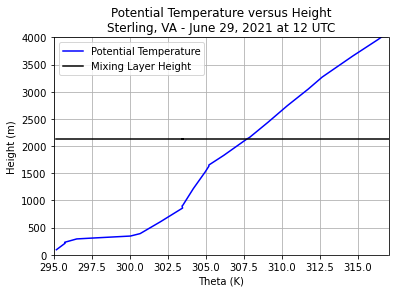

In [27]:
plt.plot(Theta1,h1, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta1, MLH1, c="BLACK", label="Mixing Layer Height")
plt.xlabel('Theta (K)')
plt.xlim(295,317)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - June 29, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0629202112ZPT.png")

In [ ]:
plt.plot(RH1,h1, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH1,MLH1, c="BLACK", label="Mixing Layer Height")

plt.xlabel('Relative Humidity (%)')
plt.xlim(20, np.amax(RH1))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - June 29, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0629202112ZRH.png")

In [ ]:
plt.plot(q1,h1, c="green", label='Specidic Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q1, MLH1, c="BLACK", label="Mixing Layer Height")
plt.xlabel('q (g/kg)')
plt.xlim(0.002, np.amax(q1))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - June 29, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0629202112ZSH.png")

In [ ]:
plt.plot(N1,h1, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N1,MLH1, c="black",label='Mixing Layer Height')
plt.xlabel('N')
plt.xlim(180,np.amax(N1))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - June 29, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0629202112ZR.png")

## Importing the Data

### June 30 2021 at 00Z

In [40]:
date30AT00Z = datetime(2021, 6, 30, 0) # Year, month, day, time
station = 'IAD' # Three letter code 

In [41]:
df2 = WyomingUpperAir.request_data(date30AT00Z, station)

In [42]:
df2 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1010.0,93,32.2,21.2,200.0,7.0,2.394141,6.577848,IAD,72403,2021-06-30,38.98,-77.46,93.0,32.44
1,1000.0,180,31.0,19.0,205.0,10.0,4.226183,9.063078,IAD,72403,2021-06-30,38.98,-77.46,93.0,32.44
2,986.0,305,29.9,18.8,210.0,13.0,6.500000,11.258330,IAD,72403,2021-06-30,38.98,-77.46,93.0,32.44
3,952.8,610,27.0,18.1,210.0,14.0,7.000000,12.124356,IAD,72403,2021-06-30,38.98,-77.46,93.0,32.44
4,925.0,873,24.6,17.6,210.0,13.0,6.500000,11.258330,IAD,72403,2021-06-30,38.98,-77.46,93.0,32.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,14.1,29261,-42.1,-83.2,45.0,21.0,-14.849242,-14.849242,IAD,72403,2021-06-30,38.98,-77.46,93.0,32.44
105,13.5,29566,-41.5,-83.0,65.0,23.0,-20.845079,-9.720220,IAD,72403,2021-06-30,38.98,-77.46,93.0,32.44
106,11.8,30480,-40.0,-82.7,75.0,28.0,-27.045923,-7.246933,IAD,72403,2021-06-30,38.98,-77.46,93.0,32.44
107,10.3,31394,-38.4,-82.3,110.0,26.0,-24.432008,8.892524,IAD,72403,2021-06-30,38.98,-77.46,93.0,32.44


In [43]:
h2 = df2['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P2 = df2['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC2 = df2['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC2 = df2['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h2

Magnitude,[ 93 180 305 610 873 914 1219 1338 1524 1608 1829 1979 2117 2134 2438 2475 2743 3048 3253 3658 4267 4436 4572 4584 4679 4748 4877 5182 5923 5970 6096 6401 6706 7010 7315 7620 7680 7811 7925 8357 8534 8839 9108 9144 9760 10058 10142 10668 10720 11010 11278 12470 12497 12727 14021 14250 14630 14886 14935 15204 15240 15542 15545 15850 16154 16630 16690 16764 17050 17069 17374 17545 17678 17983 18288 18593 18880 19286 19812 20016 20422 20970 21336 21347 21946 22359 22555 22860 23470 23774 24260 24384 24689 24943 24994 25603 25908 26518 26714 26910 27127 27432 28346 28956 29261 29566 30480 31394 31462]
Units,meter


In [44]:
T_kelvin2 = T_degC2.to('kelvin')
Td_kelvin2 = Td_degC2.to('kelvin')

In [45]:
Theta2 = mpcalc.potential_temperature(P2, T_kelvin2) # This line calculates the potential temperature in units of kelvin
RH2 = mpcalc.relative_humidity_from_dewpoint(T_kelvin2, Td_kelvin2)*100 # This line calculates the Relative Humidity
q2 = mpcalc.specific_humidity_from_dewpoint(P2, Td_kelvin2) # This line calculates the Specific Humidity
mr2 = mpcalc.mixing_ratio_from_specific_humidity(q2) # This line calculates the Mixing Ratio
e2 = mpcalc.vapor_pressure(P2, mr2) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [46]:
N2 = ((77.6)*(P2/T_kelvin2)).magnitude + ((3.73)*(10**5)*(e2/(T_kelvin2**2))).magnitude # There's a discrepancy between the units so I used '.magnitude'

# Gradient coding for June 30 at 00Z

In [47]:
gradTheta2 = np.gradient(Theta2[0:22]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta2 # This prints the gradient of the Potential Temperature array
largestTheta2 = np.argsort(gradTheta2)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta2 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:22] range of atmosphere positions are 14, 9, 17, 18, 8, 20, 16, 12, 11, 19

gradRH2 = np.gradient(RH2[0:22]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH2 # This prints the gradient of the Relative Humidity array
smallestRH2 = np.argsort(gradRH2)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH2 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:22] range of atmosphere positions are 11, 12, 13, 14, 8, 0, 9, 7, 10, 1


gradq2 = np.gradient(q2[0:22]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq2 # This prints the gradient of the Specific Humidity array
smallestq2 = np.argsort(gradq2)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq2 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:22] range of atmosphere positions are 11, 12, 0, 13, 14, 8, 1, 7, 9, 10


gradN2 = np.gradient(N2[0:22]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN2 # This prints the gradient of the Refractivity array
smallestN2 = np.argsort(gradN2)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN2 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:22] range of atmosphere positions are 11, 0, 12, 14, 13, 19, 8, 10, 7, 9

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

MLH2 = h2[11]
MLH2 = np.ones(109)*MLH2
MLH2

Magnitude,[1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0 1979.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [48]:
df2.loc[11]

pressure                        814.0
height                           1979
temperature                      17.2
dewpoint                          9.2
direction                       258.0
speed                            10.0
u_wind                       9.781476
v_wind                       2.079117
station                           IAD
station_number                  72403
time              2021-06-30 00:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                              32.44
Name: 11, dtype: object

## Plotting for June 30, 2021 at 00Z

In [ ]:
plt.plot(Theta2,h2, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta2,MLH2, c="black", label="Mixing Layer Height") 
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta2),318)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - June 30, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0630202100ZPT.png")

In [ ]:
plt.plot(RH2,h2, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH2,MLH2, c="black", label="Mixing Layer Height")
plt.xlabel('Relative Humidity (%)')
plt.xlim(10,np.amax(RH2))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - June 30, 2021 at 0 UTC')
plt.grid(True)
plt.savefig("0630202100ZRH.png")

In [ ]:
plt.plot(q2,h2, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q2,MLH2, c="Black",label='Mixing Layer Height')
plt.xlabel('q (g/kg)')
plt.xlim(0.001,np.amax(q2))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - June 30, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0630202100ZSH.png")

In [ ]:
plt.plot(N2,h2, c="brown", label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N2,MLH2, c="black", label='Mixing Layer Height')
plt.xlabel('N')
plt.xlim(180,np.amax(N2))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - June 30, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0630202100ZR.png")

## Importing the Data

### June 30 2021 at 12Z

In [56]:
date30AT12Z = datetime(2021, 6, 30, 12) # Year, month, day, time
station = 'IAD' # Three letter code 

In [57]:
df3 = WyomingUpperAir.request_data(date30AT12Z, station)

In [58]:
#df3 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [59]:
h3 = df3['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P3 = df3['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC3 = df3['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC3 = df3['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h3

Magnitude,[ 93 166 201 263 305 610 711 853 914 1219 1524 1588 1829 1896 2134 2234 2386 2438 2473 2743 2832 3227 3658 3674 3962 4025 4267 4572 4592 4877 5486 5745 5930 6096 6810 7620 7630 7993 8189 8574 8998 9144 9465 9720 10668 10784 10970 11278 11887 12420 12802 12945 13106 13411 14200 14326 14529 15103 15240 16154 16459 16579 16640 16764 17151 17374 17678 17689 17983 18288 18593 18840 19202 19230 19507 19812 20117 20422 20930 21031 21084 21336 21946 22250 22295 22555 23165 23330 24200 24308 24384 25053 25298 26276 26518 26840 27432 28042 28079 28956 29261 29870 30175 30480 31090 31490 31699 31840]
Units,meter


In [60]:
T_kelvin3 = T_degC3.to('kelvin')
Td_kelvin3 = Td_degC3.to('kelvin')

In [61]:
Theta3 = mpcalc.potential_temperature(P3, T_kelvin3) # This line calculates the potential temperature in units of kelvin
RH3 = mpcalc.relative_humidity_from_dewpoint(T_kelvin3, Td_kelvin3)*100 # This line calculates the Relative Humidity
q3 = mpcalc.specific_humidity_from_dewpoint(P3, Td_kelvin3) # This line calculates the Specific Humidity
mr3 = mpcalc.mixing_ratio_from_specific_humidity(q3) # This line calculates the Mixing Ratio
e3 = mpcalc.vapor_pressure(P3, mr3) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [62]:
N3 = ((77.6)*(P3/T_kelvin3)).magnitude + ((3.73)*(10**5)*(e3/(T_kelvin3**2))).magnitude # There's a discrepancy between the units so I used '.magnitude'

# Gradient coding for June 30 at 12Z

In [63]:
gradTheta3 = np.gradient(Theta3[0:25]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta3 # This prints the gradient of the Potential Temperature array
largestTheta3 = np.argsort(gradTheta3)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta3 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# # The Theta[0:25] range of atmosphere positions are 18,  0, 16, 15, 24, 19,  4,  5,  3,  2

gradRH3 = np.gradient(RH3[0:25]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH3 # This prints the gradient of the Relative Humidity array
smallestRH3 = np.argsort(gradRH3)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH3 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:25] range of atmosphere positions are 16, 15, 24,  2,  3, 23,  0, 14,  1, 17


gradq3 = np.gradient(q3[0:25]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq3 # This prints the gradient of the Specific Humidity array
smallestq3 = np.argsort(gradq3)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq3 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:25] range of atmosphere positions are 15, 16, 24, 14,  0, 13, 23,  2,  3,  1


gradN3 = np.gradient(N3[0:25]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN3 # This prints the gradient of the Refractivity array
smallestN3 = np.argsort(gradN3)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN3 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:25] range of atmosphere positions are 15, 16, 24, 14,  9,  0, 13,  2,  3, 23

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

MLH3 = h3[3]
MLH3 = np.ones(108)*MLH3
MLH3

Magnitude,[263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0 263.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [64]:
df3.loc[3]

pressure                        989.0
height                            263
temperature                      26.6
dewpoint                         16.6
direction                       271.0
speed                             7.0
u_wind                       6.998934
v_wind                      -0.122167
station                           IAD
station_number                  72403
time              2021-06-30 12:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                              34.92
Name: 3, dtype: object

## Plotting for June 30, 2021 at 12Z

In [ ]:
plt.plot(Theta3,h3, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta3,MLH3, c="black", label="Mixing Layer Height")
plt.xlabel('Theta (K)')
plt.xlim(295,315)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - June 30,2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0630202112ZPT.png")

In [ ]:
plt.plot(RH3,h3, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH3,MLH3, c="black", label="Mixing Layer Height")
plt.xlabel('Relative Humidity (%)')
plt.xlim(20,np.amax(RH3))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - June 30,2021 at 12 UTC')
plt.grid(True)
plt.savefig("0630202112ZRH.png")

In [ ]:
plt.plot(q3,h3, c="green",label="Specific Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q3,MLH3, c="black",label="Mixing Layer Height")
plt.xlabel('q (g/kg)')
plt.xlim(0.002,np.amax(q3))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - June 30,2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0630202112ZSH.png")

In [ ]:
plt.plot(N3,h3, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N3,MLH3, c="black",label='Mixing Layer Height')
plt.xlabel('N')
plt.xlim(180,np.amax(N3))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - June 30,2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0630202112ZR.png")

## Importing the Data

### July 1 2021 at 00Z

In [65]:
date01AT00Z = datetime(2021, 7, 1, 0) # Year, month, day, time
station = 'IAD' # Three letter code 

In [66]:
df4 = WyomingUpperAir.request_data(date01AT00Z, station)

In [67]:
#df4 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [68]:
h4 = df4['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P4 = df4['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC4 = df4['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC4 = df4['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h4

Magnitude,[ 93 138 305 610 827 914 1219 1524 1563 1829 2134 2438 2743 3204 3658 4267 4877 5900 6096 7600 7620 9144 9690 10668 10950 12410 14190 15240 16650 18288 18850 20950 21336 24220 26890 27432 30480 31550]
Units,meter


In [69]:
T_kelvin4 = T_degC4.to('kelvin')
Td_kelvin4 = Td_degC4.to('kelvin')

In [70]:
Theta4 = mpcalc.potential_temperature(P4, T_kelvin4) # This line calculates the potential temperature in units of kelvin
RH4 = mpcalc.relative_humidity_from_dewpoint(T_kelvin4, Td_kelvin4)*100 # This line calculates the Relative Humidity
q4 = mpcalc.specific_humidity_from_dewpoint(P4, Td_kelvin4) # This line calculates the Specific Humidity
mr4 = mpcalc.mixing_ratio_from_specific_humidity(q4) # This line calculates the Mixing Ratio
e4 = mpcalc.vapor_pressure(P4, mr4) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [71]:
N4 = ((77.6)*(P4/T_kelvin4)).magnitude + ((3.73)*(10**5)*(e4/(T_kelvin4**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 1 at 00Z

In [72]:
gradTheta4 = np.gradient(Theta4[0:15]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta4 # This prints the gradient of the Potential Temperature array
largestTheta4 = np.argsort(gradTheta4)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta4 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# # The Theta[0:15] range of atmosphere positions are 1,  4, 10,  0, 12,  1, 13, 14,  2,  3

gradRH4 = np.gradient(RH4[0:15]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH4 # This prints the gradient of the Relative Humidity array
smallestRH4 = np.argsort(gradRH4)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH4 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:15] range of atmosphere positions are 0,  1,  3,  2,  4, 12, 11, 10,  9,  8


gradq4 = np.gradient(q4[0:15]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq4 # This prints the gradient of the Specific Humidity array
smallestq4 = np.argsort(gradq4)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq4 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:15] range of atmosphere positions are 0,  3,  2,  1, 12, 10,  9, 13, 11, 14


gradN4 = np.gradient(N4[0:15]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN4 # This prints the gradient of the Refractivity array
smallestN4 = np.argsort(gradN4)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN4 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:15] range of atmosphere positions are 3,  2, 13, 12, 14, 10,  9, 11,  1,  0

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

MLH4 = h4[1] 
MLH4 = np.ones(38)*MLH4
MLH4

Magnitude,[138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0 138.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [73]:
df4.loc[1]

pressure                       1000.0
height                            138
temperature                      24.6
dewpoint                         20.1
direction                         270
speed                               7
u_wind                            7.0
v_wind                            0.0
station                           IAD
station_number                  72403
time              2021-07-01 00:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                               47.8
Name: 1, dtype: object

## Plotting for July 1, 2021 at 00Z

In [ ]:
plt.plot(Theta4,h4, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta4,MLH4, c="black", label="Mixing Layer Height")
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta4),340)
plt.ylabel('Height (m)')
plt.ylim(0,10000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 1, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0701202100ZPT.png")

In [ ]:
plt.plot(RH4,h4, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH4,MLH4, c="black", label="Mixing Layer Height")
plt.xlabel('Relative Humidity (%)')
plt.xlim(53,np.amax(RH4))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 1, 2021 at 0 UTC')
plt.grid(True)
plt.savefig("0701202100ZRH.png")

In [ ]:
plt.plot(q4,h4, c="green",label='Specifc Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q4,MLH4, c="black",label='Mixing Layer Height')
plt.xlabel('q (g/kg)')
plt.xlim(0.005,np.amax(q4))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 1, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0701202100ZSH.png")

In [ ]:
plt.plot(N4,h4, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N4,MLH4, c="black",label='Mixing Layer Height')
plt.xlabel('N')
plt.xlim(200,np.amax(N4))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 1, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0701202100ZR.png")

## Importing the Data

### July 1 2021 at 12Z

In [92]:
date01AT12Z = datetime(2021, 7, 1, 12) # Year, month, day, time
station = 'IAD' # Three letter code 

In [93]:
df5 = WyomingUpperAir.request_data(date01AT12Z, station)

In [94]:
#df5 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [95]:
h5 = df5['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P5 = df5['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC5 = df5['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC5 = df5['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h5

Magnitude,[ 93 120 173 306 610 802 811 914 1219 1524 1531 1611 1829 2134 2438 2743 2834 3158 3658 3962 4267 4517 4877 4889 4987 5030 5101 5182 5409 5850 5881 5959 6096 6263 6713 6850 7257 7550 7620 8230 8510 8839 9130 9144 9286 9468 9630 9754 10058 10163 10668 10890 11162 11278 12192 12340 12802 13310 13716 14110 14151 14799 15240 15545 15838 16154 16529 16590 16764 17374 17678 17983 18288 18593 18800 18898 19202 20422 20438 20910 21012 21031 21336 21641 22250 22555 24079 24190 24384 24994 25179 25298 25603 26656 26850 27432 27737 28346 29566 29870 30480 30738 30785 31090 31510 31788 32004 32387 32918 33528 33688]
Units,meter


In [96]:
T_kelvin5 = T_degC5.to('kelvin')
Td_kelvin5 = Td_degC5.to('kelvin')

In [97]:
Theta5 = mpcalc.potential_temperature(P5, T_kelvin5) # This line calculates the potential temperature in units of kelvin
RH5 = mpcalc.relative_humidity_from_dewpoint(T_kelvin5, Td_kelvin5)*100 # This line calculates the Relative Humidity
q5 = mpcalc.specific_humidity_from_dewpoint(P5, Td_kelvin5) # This line calculates the Specific Humidity
mr5 = mpcalc.mixing_ratio_from_specific_humidity(q5) # This line calculates the Mixing Ratio
e5 = mpcalc.vapor_pressure(P5, mr5) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [98]:
N5 = ((77.6)*(P5/T_kelvin5)).magnitude + ((3.73)*(10**5)*(e5/(T_kelvin5**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 1 at 12Z

In [101]:
gradTheta5 = np.gradient(Theta5[0:20]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta5 # This prints the gradient of the Potential Temperature array
largestTheta5 = np.argsort(gradTheta5)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta5 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:20] range of atmosphere positions are 15, 19, 12,  2, 17, 18, 14, 13,  4,  3

gradRH5 = np.gradient(RH5[0:20]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH5 # This prints the gradient of the Relative Humidity array
smallestRH5 = np.argsort(gradRH5)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH5 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:20] range of atmosphere positions are 2,  3, 14, 13, 12, 15, 18, 19, 11,  4


gradq5 = np.gradient(q5[0:20]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq5 # This prints the gradient of the Specific Humidity array
smallestq5 = np.argsort(gradq5)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq5 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:20] range of atmosphere positions are 2, 17, 18, 13,  3, 14, 12, 19, 15, 16


gradN5 = np.gradient(N5[0:20]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN5 # This prints the gradient of the Refractivity array
smallestN5 = np.argsort(gradN5)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN5 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:20] range of atmosphere positions are 3, 17, 13, 18, 14, 12,  2,  4,  8, 19

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

#h5[]

array([ 3, 17, 13, 18, 14, 12,  2,  4,  8, 19])

## Plotting for July 1, 2021 at 12Z

In [ ]:
plt.plot(Theta5,h5, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta5),315)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 1, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0701202112ZPT.png")

In [ ]:
plt.plot(RH5,h5, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Relative Humidity (%)')
plt.xlim(74,np.amax(RH5))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 1, 2021 at 12 UTC')
plt.grid(True)
plt.savefig("0701202112ZRH.png")

In [ ]:
plt.plot(q5,h5, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('q (g/kg)')
plt.xlim(0.005,np.amax(q5))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 1, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0701202112ZSH.png")

In [ ]:
plt.plot(N5,h5, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('N')
plt.xlim(200,np.amax(N5))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 1, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0701202112ZR.png")

## Importing the Data

### July 2 2021 at 00Z

In [ ]:
date02AT00Z = datetime(2021, 7, 2, 0) # Year, month, day, time
station = 'IAD' # Three letter code 

In [ ]:
df6 = WyomingUpperAir.request_data(date02AT00Z, station)

In [ ]:
#df6 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [ ]:
h6 = df6['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P6 = df6['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC6 = df6['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC6 = df6['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h6

In [ ]:
T_kelvin6 = T_degC6.to('kelvin')
Td_kelvin6 = Td_degC6.to('kelvin')

In [ ]:
Theta6 = mpcalc.potential_temperature(P6, T_kelvin6) # This line calculates the potential temperature in units of kelvin
RH6 = mpcalc.relative_humidity_from_dewpoint(T_kelvin6, Td_kelvin6)*100 # This line calculates the Relative Humidity
q6 = mpcalc.specific_humidity_from_dewpoint(P6, Td_kelvin6) # This line calculates the Specific Humidity
mr6 = mpcalc.mixing_ratio_from_specific_humidity(q6) # This line calculates the Mixing Ratio
e6 = mpcalc.vapor_pressure(P6, mr6) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [ ]:
N6 = ((77.6)*(P6/T_kelvin6)).magnitude + ((3.73)*(10**5)*(e6/(T_kelvin6**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 2 at 00Z

In [ ]:
gradTheta6 = np.gradient(Theta6[0:20]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta6 # This prints the gradient of the Potential Temperature array
largestTheta6 = np.argsort(gradTheta6)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta6 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:20] range of atmosphere positions are 0,  2, 16, 18,  1, 17, 13, 10, 11, 12

gradRH6 = np.gradient(RH6[0:20]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH6 # This prints the gradient of the Relative Humidity array
smallestRH6 = np.argsort(gradRH6)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH6 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:20] range of atmosphere positions are 14,  1,  3,  2,  0, 15, 12, 11,  4, 10


gradq6 = np.gradient(q6[0:20]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq6 # This prints the gradient of the Specific Humidity array
smallestq6 = np.argsort(gradq6)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq6 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:20] range of atmosphere positions are 1,  0,  2,  3, 11, 12, 14, 10, 15,  4


gradN6 = np.gradient(N6[0:20]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN6 # This prints the gradient of the Refractivity array
smallestN6 = np.argsort(gradN6)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN6 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:20] range of atmosphere positions are 1,  0,  2, 11, 12, 10,  6,  3, 15, 13

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

#h6[]

## Plotting for July 2, 2021 at 00Z

In [ ]:
plt.plot(Theta6,h6, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta6),315)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 2, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0702202100ZPT.png")

In [ ]:
plt.plot(RH6,h6, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Relative Humidity (%)')
plt.xlim(67,90)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 2, 2021 at 0 UTC')
plt.grid(True)
plt.savefig("0702202100ZRH.png")

In [ ]:
plt.plot(q6,h6, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('q (g/kg)')
plt.xlim(0.0055,np.amax(q6))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 2, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0702202100ZSH.png")

In [ ]:
plt.plot(N6,h6, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('N')
plt.xlim(200,np.amax(N6))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 2, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0702202100ZR.png")

## Importing the Data

### July 2 2021 at 12Z

In [80]:
date02AT12Z = datetime(2021, 7, 2, 12) # Year, month, day, time
station = 'IAD' # Three letter code 

In [81]:
df7 = WyomingUpperAir.request_data(date02AT12Z, station)

In [82]:
#df7 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [83]:
h7 = df7['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P7 = df7['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC7 = df7['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC7 = df7['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h7

Magnitude,[ 93 305 610 652 744 914 1219 1462 1524 1829 2134 2438 2580 2743 3048 3066 3396 3553 3658 4267 4302 4475 4817 4877 5509 5720 5766 5791 6017 6096 6706 7410 7620 7925 8227 9144 9490 9823 10668 10740 11582 11600 12190 12578 12802 13519 13716 14010 14021 14445 14935 15240 16154 16459 16488 16550 16764 17069 17374 17678 18288 18593 18657 18780 18898 19202 19507 19531 19812 20117 20726 20900 21336 21641 21946 22250 22435 22555 22860 24079 24180 24384 24689 25235 26112 26830 27127 27344 27432 28314 28651 28956 29566 29825]
Units,meter


In [84]:
T_kelvin7 = T_degC7.to('kelvin')
Td_kelvin7 = Td_degC7.to('kelvin')

In [85]:
Theta7 = mpcalc.potential_temperature(P7, T_kelvin7) # This line calculates the potential temperature in units of kelvin
RH7 = mpcalc.relative_humidity_from_dewpoint(T_kelvin7, Td_kelvin7)*100 # This line calculates the Relative Humidity
q7 = mpcalc.specific_humidity_from_dewpoint(P7, Td_kelvin7) # This line calculates the Specific Humidity
mr7 = mpcalc.mixing_ratio_from_specific_humidity(q7) # This line calculates the Mixing Ratio
e7 = mpcalc.vapor_pressure(P7, mr7) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [86]:
N7 = ((77.6)*(P7/T_kelvin7)).magnitude + ((3.73)*(10**5)*(e7/(T_kelvin7**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 2 at 12Z

In [87]:
gradTheta7 = np.gradient(Theta7[0:19]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta7 # This prints the gradient of the Potential Temperature array
largestTheta7 = np.argsort(gradTheta7)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta7 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:19] range of atmosphere positions are 14, 11,  6,  0, 10, 13,  1,  9, 15, 16

gradRH7 = np.gradient(RH7[0:19]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH7 # This prints the gradient of the Relative Humidity array
smallestRH7 = np.argsort(gradRH7)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH7 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:19] range of atmosphere positions are 1,  0, 15,  2, 13, 14,  6,  5, 18,  7


gradq7 = np.gradient(q7[0:19]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq7 # This prints the gradient of the Specific Humidity array
smallestq7 = np.argsort(gradq7)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq7 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:19] range of atmosphere positions are 1,  0,  2,  6,  5,  9, 15, 10, 13,  7


gradN7 = np.gradient(N7[0:19]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN7 # This prints the gradient of the Refractivity array
smallestN7 = np.argsort(gradN7)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN7 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:19] range of atmosphere positions are 1,  0,  2,  6,  5,  9, 10, 13, 11, 15

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

MLH7 = h7[0]
MLH7 = np.ones(94)*MLH7
MLH7

Magnitude,[93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0 93.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [88]:
df7.loc[0]

pressure                        998.0
height                             93
temperature                      20.8
dewpoint                         19.8
direction                       200.0
speed                             3.0
u_wind                        1.02606
v_wind                       2.819078
station                           IAD
station_number                  72403
time              2021-07-02 12:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                              40.44
Name: 0, dtype: object

## Plotting for July 2, 2021 at 12Z

In [ ]:
plt.plot(Theta7,h7, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta7,MLH7, c="black", label="Mixing Layer Height")
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta7),315)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 2, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0702202112ZPT.png")

In [ ]:
plt.plot(RH7,h7, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH7,MLH7, c="black", label="Mixing Layer Height")
plt.xlabel('Relative Humidity (%)')
plt.xlim(75,np.amax(RH7))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 2, 2021 at 12 UTC')
plt.grid(True)
plt.savefig("0702202112ZRH.png")

In [ ]:
plt.plot(q7,h7, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q7,MLH7, c="black",label='Mixing Layer Height')
plt.xlabel('q (g/kg)')
plt.xlim(0.0045,np.amax(q7))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 2, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0702202112ZSH.png")

In [ ]:
plt.plot(N7,h7, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N7,MLH7, c="black",label='Mixing Layer Height')
plt.xlabel('N')
plt.xlim(200,np.amax(N7))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 2, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0702202112ZR.png")

## Importing the Data

### July 3 2021 at 00Z

In [90]:
date03AT00Z = datetime(2021, 7, 3, 0) # Year, month, day, time
station = 'IAD' # Three letter code 

In [95]:
df8 = WyomingUpperAir.request_data(date03AT00Z, station)

In [96]:
df8 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,998.0,93,25.2,10.2,295.0,6.0,5.437847,-2.535710,IAD,72403,2021-07-03,38.98,-77.46,93.0,19.46
1,973.8,305,23.1,9.0,315.0,16.0,11.313708,-11.313708,IAD,72403,2021-07-03,38.98,-77.46,93.0,19.46
2,939.9,610,20.0,7.4,310.0,15.0,11.490667,-9.641814,IAD,72403,2021-07-03,38.98,-77.46,93.0,19.46
3,925.0,748,18.6,6.6,310.0,15.0,11.490667,-9.641814,IAD,72403,2021-07-03,38.98,-77.46,93.0,19.46
4,907.1,914,17.0,6.2,305.0,16.0,13.106433,-9.177223,IAD,72403,2021-07-03,38.98,-77.46,93.0,19.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,9.4,32004,-41.8,-81.9,85.0,22.0,-21.916283,-1.917426,IAD,72403,2021-07-03,38.98,-77.46,93.0,19.46
111,9.4,31980,-41.9,-81.9,87.0,22.0,-21.969850,-1.151391,IAD,72403,2021-07-03,38.98,-77.46,93.0,19.46
112,8.2,32918,-37.3,-81.3,85.0,31.0,-30.882036,-2.701828,IAD,72403,2021-07-03,38.98,-77.46,93.0,19.46
113,8.2,32914,-37.3,-81.3,85.0,31.0,-30.882036,-2.701828,IAD,72403,2021-07-03,38.98,-77.46,93.0,19.46


In [97]:
h8 = df8['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P8 = df8['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC8 = df8['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC8 = df8['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h8

Magnitude,[ 93 305 610 748 914 1219 1465 1524 1829 2134 2438 2637 2743 2835 3051 3109 3274 3353 3658 3962 4267 4877 5444 5700 6096 6813 6951 7360 7620 7716 8126 8348 8617 8917 9144 9295 9410 9449 9619 9906 10333 10363 10650 10668 10812 11178 11278 11897 12120 12497 13106 13253 13990 14326 14935 15240 16154 16459 16508 16570 16764 16936 17374 17484 18288 18593 18810 18898 19202 19507 19812 20117 20422 20726 20930 21031 21336 21597 21946 22250 22555 22860 23165 23470 23682 23774 24200 24689 24738 24994 25305 25603 26213 26687 26822 26850 27127 27445 27432 28042 28651 28835 29261 30175 30254 30480 30785 31090 31560 31699 32004 31980 32918 32914 32998]
Units,meter


In [98]:
T_kelvin8 = T_degC8.to('kelvin')
Td_kelvin8 = Td_degC8.to('kelvin')

In [99]:
Theta8 = mpcalc.potential_temperature(P8, T_kelvin8) # This line calculates the potential temperature in units of kelvin
RH8 = mpcalc.relative_humidity_from_dewpoint(T_kelvin8, Td_kelvin8)*100 # This line calculates the Relative Humidity
q8 = mpcalc.specific_humidity_from_dewpoint(P8, Td_kelvin8) # This line calculates the Specific Humidity
mr8 = mpcalc.mixing_ratio_from_specific_humidity(q8) # This line calculates the Mixing Ratio
e8 = mpcalc.vapor_pressure(P8, mr8) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [100]:
N8 = ((77.6)*(P8/T_kelvin8)).magnitude + ((3.73)*(10**5)*(e8/(T_kelvin8**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 3 at 00Z

In [101]:
gradTheta8 = np.gradient(Theta8[0:20]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta8 # This prints the gradient of the Potential Temperature array
largestTheta8 = np.argsort(gradTheta8)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta8 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:20] range of atmosphere positions are 8, 11, 12, 16, 17, 19, 18, 15, 13, 14

gradRH8 = np.gradient(RH8[0:20]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH8 # This prints the gradient of the Relative Humidity array
smallestRH8 = np.argsort(gradRH8)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH8 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:20] range of atmosphere positions are 14, 13, 15, 12, 18, 16, 19, 17, 11,  0


gradq8 = np.gradient(q8[0:20]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq8 # This prints the gradient of the Specific Humidity array
smallestq8 = np.argsort(gradq8)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq8 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:20] range of atmosphere positions are 14, 13, 15,  1,  0,  2,  8,  9, 10, 11


gradN8 = np.gradient(N8[0:20]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN8 # This prints the gradient of the Refractivity array
smallestN8 = np.argsort(gradN8)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN8 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:20] range of atmosphere positions are 14, 13,  1,  8,  9,  0,  2, 10,  5, 18

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

MLH8 = h8[13]
MLH8 = np.ones(115)*MLH8
MLH8

Magnitude,[2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0 2835.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [102]:
df8.loc[13]

pressure                        719.0
height                           2835
temperature                       0.6
dewpoint                         -2.0
direction                       296.0
speed                            27.0
u_wind                      24.267439
v_wind                     -11.836021
station                           IAD
station_number                  72403
time              2021-07-03 00:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                              19.46
Name: 13, dtype: object

## Plotting for July 3, 2021 at 00Z

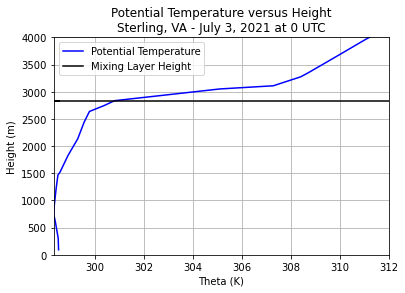

In [118]:
plt.plot(Theta8,h8, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta8,MLH8, c="bLACK", label="Mixing Layer Height")
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta8),312)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 3, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0703202100ZPT.png")

In [ ]:
plt.plot(RH8,h8, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH8,MLH8, c="black", label="Mixing Layer Height")
plt.xlabel('Relative Humidity (%)')
plt.xlim(0,np.amax(RH8))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 3, 2021 at 0 UTC')
plt.grid(True)
plt.savefig("0703202100ZRH.png")

In [ ]:
plt.plot(q8,h8, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q8,MLH8, c="black",label='Mixing Layer Height')
plt.xlabel('q (g/kg)')
plt.xlim(0.000,np.amax(q8))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 3, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0703202100ZSH.png")

In [ ]:
plt.plot(N8,h8, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N8,MLH8, c="black",label='Mixing Layer Height')
plt.xlabel('N')
plt.xlim(170,np.amax(N8))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 3, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0703202100ZR.png")

## Importing the Data

### July 3 2021 at 12Z

In [ ]:
date03AT12Z = datetime(2021, 7, 3, 12) # Year, month, day, time
station = 'IAD' # Three letter code 

In [ ]:
df9 = WyomingUpperAir.request_data(date03AT12Z, station)

In [ ]:
#df9 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [ ]:
h9 = df9['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P9 = df9['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC9 = df9['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC9 = df9['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h9

In [ ]:
T_kelvin9 = T_degC9.to('kelvin')
Td_kelvin9 = Td_degC9.to('kelvin')

In [ ]:
Theta9 = mpcalc.potential_temperature(P9, T_kelvin9) # This line calculates the potential temperature in units of kelvin
RH9 = mpcalc.relative_humidity_from_dewpoint(T_kelvin9, Td_kelvin9)*100 # This line calculates the Relative Humidity
q9 = mpcalc.specific_humidity_from_dewpoint(P9, Td_kelvin9) # This line calculates the Specific Humidity
mr9 = mpcalc.mixing_ratio_from_specific_humidity(q9) # This line calculates the Mixing Ratio
e9 = mpcalc.vapor_pressure(P9, mr9) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [ ]:
N9 = ((77.6)*(P9/T_kelvin9)).magnitude + ((3.73)*(10**5)*(e9/(T_kelvin9**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 3 at 12Z

In [ ]:
gradTheta9 = np.gradient(Theta9[0:22]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta9 # This prints the gradient of the Potential Temperature array
largestTheta9 = np.argsort(gradTheta9)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta9 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:22] range of atmosphere positions are 6, 12, 16, 18,  7, 11, 17, 21, 19, 20

gradRH9 = np.gradient(RH9[0:22]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH9 # This prints the gradient of the Relative Humidity array
smallestRH9 = np.argsort(gradRH9)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH9 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:22] range of atmosphere positions are 18, 19, 17,  7, 11,  6, 12,  8,  5,  9


gradq9 = np.gradient(q9[0:22]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq9 # This prints the gradient of the Specific Humidity array
smallestq9 = np.argsort(gradq9)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq9 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:22] range of atmosphere positions are 11, 18, 19,  1,  8,  0,  2, 10, 12,  9


gradN9 = np.gradient(N9[0:22]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN9 # This prints the gradient of the Refractivity array
smallestN9 = np.argsort(gradN9)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN9 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:22] range of atmosphere positions are 11,  1,  0,  2, 19, 12,  8, 10,  7, 18

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

#h9[]

## Plotting for July 3, 2021 at 12Z

In [ ]:
plt.plot(Theta9,h9, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta9),310)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 3, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0703202112ZPT.png")

In [ ]:
plt.plot(RH9,h9, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Relative Humidity (%)')
plt.xlim(35,np.amax(RH9))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 3, 2021 at 12 UTC')
plt.grid(True) 
plt.grid(True)
plt.savefig("0703202112ZRH.png")

In [ ]:
plt.plot(q9,h9, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('q (g/kg)')
plt.xlim(0.0015,np.amax(q9))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 3, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0703202112ZSH.png")

In [ ]:
plt.plot(N9,h9, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('N')
plt.xlim(180,np.amax(N9))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 3, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0703202112ZR.png")

## Importing the Data

### July 4 2021 at 00Z

In [ ]:
date04AT00Z = datetime(2021, 7, 4, 0) # Year, month, day, time
station = 'IAD' # Three letter code 

In [ ]:
df10 = WyomingUpperAir.request_data(date04AT00Z, station)

In [ ]:
#df10 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [ ]:
h10 = df10['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P10 = df10['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC10 = df10['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC10 = df10['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h10

In [ ]:
T_kelvin10 = T_degC10.to('kelvin')
Td_kelvin10 = Td_degC10.to('kelvin')

In [ ]:
Theta10 = mpcalc.potential_temperature(P10, T_kelvin10) # This line calculates the potential temperature in units of kelvin
RH10 = mpcalc.relative_humidity_from_dewpoint(T_kelvin10, Td_kelvin10)*100 # This line calculates the Relative Humidity
q10 = mpcalc.specific_humidity_from_dewpoint(P10, Td_kelvin10) # This line calculates the Specific Humidity
mr10 = mpcalc.mixing_ratio_from_specific_humidity(q10) # This line calculates the Mixing Ratio
e10 = mpcalc.vapor_pressure(P10, mr10) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [ ]:
N10 = ((77.6)*(P10/T_kelvin10)).magnitude + ((3.73)*(10**5)*(e10/(T_kelvin10**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 4 at 00Z

In [ ]:
gradTheta10 = np.gradient(Theta10[0:18]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta10 # This prints the gradient of the Potential Temperature array
largestTheta10 = np.argsort(gradTheta10)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta10 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:18] range of atmosphere positions are 1,  9,  8, 13, 11, 16, 12, 17, 15, 14

gradRH10 = np.gradient(RH10[0:18]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH10 # This prints the gradient of the Relative Humidity array
smallestRH10 = np.argsort(gradRH10)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH10 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:18] range of atmosphere positions are 12, 11, 17, 16, 13,  2,  0,  3,  1,  7


gradq10 = np.gradient(q10[0:18]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq10 # This prints the gradient of the Specific Humidity array
smallestq10 = np.argsort(gradq10)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq10 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:18] range of atmosphere positions are 12, 11,  1,  8,  2,  9,  0, 17, 10,  7


gradN10 = np.gradient(N10[0:18]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN10 # This prints the gradient of the Refractivity array
smallestN10 = np.argsort(gradN10)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN10 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:18] range of atmosphere positions are 1,  8,  9,  2, 12,  0, 14,  5, 15, 11

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

#h10[]

## Plotting for July 4, 2021 at 00Z

In [ ]:
plt.plot(Theta10,h10, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta10),308)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 4, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0704202100ZPT.png")

In [ ]:
plt.plot(RH10,h10, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Relative Humidity (%)')
plt.xlim(50,np.amax(RH10))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 4, 2021 at 0 UTC')
plt.grid(True)
plt.savefig("0704202100ZRH.png")

In [ ]:
plt.plot(q10,h10, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('q (g/kg)')
plt.xlim(0.0035,np.amax(q10))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 4, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0704202100ZSH.png")

In [ ]:
plt.plot(N10,h10, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('N')
plt.xlim(190,330)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.title('Refractivity versus Height\nSterling, VA - July 4, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0704202100ZR.png")

## Importing the Data

### July 4 2021 at 12Z

In [103]:
date04AT12Z = datetime(2021, 7, 4, 12) # Year, month, day, time
station = 'IAD' # Three letter code 

In [104]:
df11 = WyomingUpperAir.request_data(date04AT12Z, station)

In [105]:
#df11 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [106]:
h11 = df11['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P11 = df11['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC11 = df11['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC11 = df11['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h11

Magnitude,[ 93 107 141 176 246 305 610 778 914 927 1219 1327 1493 1523 1524 1829 2038 2134 2438 2734 2743 2891 2970 3048 3085 3607 3658 4267 4541 4877 5166 5730 6096 6646 7400 7547 7620 8509 8839 9144 9336 9450 10058 10668 10680 12067 12130 12497 12802 13411 13810 13980 14021 15240 16154 16459 16488 16550 17069 17374 17678 17742 17983 18189 18288 18780 18898 19563 20117 20900 21336 22781 22860 23470 24170 24235 24384 25908 26822 26820 27127 27432 27480 28651 29870 30480 30844 31394 31500 31699 32145 32533]
Units,meter


In [107]:
T_kelvin11 = T_degC11.to('kelvin')
Td_kelvin11 = Td_degC11.to('kelvin')

In [108]:
Theta11 = mpcalc.potential_temperature(P11, T_kelvin11) # This line calculates the potential temperature in units of kelvin
RH11 = mpcalc.relative_humidity_from_dewpoint(T_kelvin11, Td_kelvin11)*100 # This line calculates the Relative Humidity
q11 = mpcalc.specific_humidity_from_dewpoint(P11, Td_kelvin11) # This line calculates the Specific Humidity
mr11 = mpcalc.mixing_ratio_from_specific_humidity(q11) # This line calculates the Mixing Ratio
e11 = mpcalc.vapor_pressure(P11, mr11) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [109]:
N11 = ((77.6)*(P11/T_kelvin11)).magnitude + ((3.73)*(10**5)*(e11/(T_kelvin11**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 4 at 12Z

In [110]:
gradTheta11 = np.gradient(Theta11[0:27]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta11 # This prints the gradient of the Potential Temperature array
largestTheta11 = np.argsort(gradTheta11)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta11 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:27] range of atmosphere positions are 1, 18,  0,  4, 22, 21,  2, 25, 24,  3

gradRH11 = np.gradient(RH11[0:27]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH11 # This prints the gradient of the Relative Humidity array
smallestRH11 = np.argsort(gradRH11)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH11 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:27] range of atmosphere positions are 21, 22,  3,  2, 24, 25, 20,  1,  0, 12


gradq11 = np.gradient(q11[0:27]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq11 # This prints the gradient of the Specific Humidity array
smallestq11 = np.argsort(gradq11)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq11 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:27] range of atmosphere positions are 21, 22, 12, 18, 11,  3, 25, 24, 17,  4


gradN11 = np.gradient(N11[0:27]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN11 # This prints the gradient of the Refractivity array
smallestN11 = np.argsort(gradN11)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN11 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:27] range of atmosphere positions are 21, 18, 25, 24,  3, 22, 17,  6, 11, 12

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

MLH11 = h11[21]
MLH11 = np.ones(92)*MLH11
MLH11

Magnitude,[2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0 2891.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [111]:
df11.loc[21]

pressure                        717.0
height                           2891
temperature                       2.2
dewpoint                         -3.8
direction                       315.0
speed                            22.0
u_wind                      15.556349
v_wind                     -15.556349
station                           IAD
station_number                  72403
time              2021-07-04 12:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                              22.39
Name: 21, dtype: object

## Plotting for July 4, 2021 at 12Z

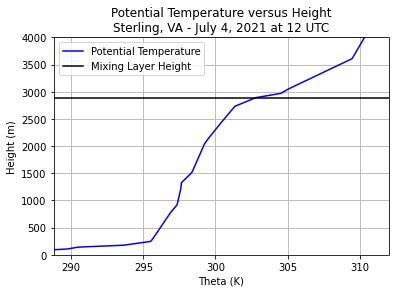

In [128]:
plt.plot(Theta11,h11, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta11,MLH11, c="black", label="Mixing Layer Height")
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta11),312)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 4, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0704202112ZPT.png")

In [ ]:
plt.plot(RH11,h11, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH11,MLH11, c="black", label="Mixing Layer Height")
plt.xlabel('Relative Humidity (%)')
plt.xlim(10,np.amax(RH11))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 4, 2021 at 12 UTC')
plt.grid(True)
plt.savefig("0704202112ZRH.png")

In [ ]:
plt.plot(q11,h11, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q11,MLH11, c="black",label='Mixing Layer Height')
plt.xlabel('q (g/kg)')
plt.xlim(np.amin(q11),np.amax(q11))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 4, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0704202112ZSH.png")

In [ ]:
plt.plot(N11,h11, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N11,MLH11, c="black",label='Mixing Layer Height')
plt.xlabel('N')
plt.xlim(180,np.amax(N11))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 4, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0704202112ZR.png")

## Importing the Data

### July 5 2021 at 00Z

In [ ]:
date05AT00Z = datetime(2021, 7, 5, 0) # Year, month, day, time
station = 'IAD' # Three letter code 

In [ ]:
df12 = WyomingUpperAir.request_data(date05AT00Z, station)

In [ ]:
#df12 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [ ]:
h12 = df12['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P12 = df12['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC12 = df12['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC12 = df12['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h12

In [ ]:
T_kelvin12 = T_degC12.to('kelvin')
Td_kelvin12 = Td_degC12.to('kelvin')

In [ ]:
Theta12 = mpcalc.potential_temperature(P12, T_kelvin12) # This line calculates the potential temperature in units of kelvin
RH12 = mpcalc.relative_humidity_from_dewpoint(T_kelvin12, Td_kelvin12)*100 # This line calculates the Relative Humidity
q12 = mpcalc.specific_humidity_from_dewpoint(P12, Td_kelvin12) # This line calculates the Specific Humidity
mr12 = mpcalc.mixing_ratio_from_specific_humidity(q12) # This line calculates the Mixing Ratio
e12 = mpcalc.vapor_pressure(P12, mr12) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [ ]:
N12 = ((77.6)*(P12/T_kelvin12)).magnitude + ((3.73)*(10**5)*(e12/(T_kelvin12**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 5 at 00Z

In [ ]:
gradTheta12 = np.gradient(Theta12[0:23]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta12 # This prints the gradient of the Potential Temperature array
largestTheta12 = np.argsort(gradTheta12)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta12 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:23] range of atmosphere positions are 11, 15, 22, 12, 14, 13, 16, 19, 17, 18


gradRH12 = np.gradient(RH12[0:23]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH12 # This prints the gradient of the Relative Humidity array
smallestRH12 = np.argsort(gradRH12)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH12 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:23] range of atmosphere positions are 22, 17, 16,  2, 21, 18, 19,  0,  1,  3


gradq12 = np.gradient(q12[0:23]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq12 # This prints the gradient of the Specific Humidity array
smallestq12 = np.argsort(gradq12)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq12 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:23] range of atmosphere positions are 2, 22,  6,  5, 17, 16, 12, 21, 14, 13


gradN12 = np.gradient(N12[0:23]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN12 # This prints the gradient of the Refractivity array
smallestN12 = np.argsort(gradN12)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN12 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:23] range of atmosphere positions are 6,  5, 17, 12, 13, 14,  2, 16, 18,  9

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

#h12[]

## Plotting for July 5, 2021 at 00Z

In [ ]:
plt.plot(Theta12,h12, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta12),312)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 5, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0705202100ZPT.png")

In [ ]:
plt.plot(RH12,h12, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('Relative Humidity (%)')
plt.xlim(35,np.amax(RH12))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 5, 2021 at 0 UTC')
plt.grid(True)
plt.savefig("0705202100ZRH.png")

In [ ]:
plt.plot(q12,h12, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('q (g/kg)')
plt.xlim(0.0035,np.amax(q12))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 5, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0705202100ZSH.png")

In [ ]:
plt.plot(N12,h12, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.xlabel('N')
plt.xlim(195,np.amax(N12))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 5, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0705202100ZR.png")

## Importing the Data

### July 5 2021 at 12Z

In [112]:
date05AT12Z = datetime(2021, 7, 5, 12) # Year, month, day, time
station = 'IAD' # Three letter code 

In [113]:
df13 = WyomingUpperAir.request_data(date05AT12Z, station)

In [114]:
#df13 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [115]:
h13 = df13['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P13 = df13['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC13 = df13['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC13 = df13['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h13

Magnitude,[ 93 143 221 305 407 610 680 819 914 1219 1464 1524 1543 1829 1970 2134 2438 2743 2788 2992 3154 3201 3353 3391 3658 4267 4572 4877 5519 5840 6096 6514 6973 7315 7530 7620 8230 8838 9144 9590 10233 10668 10820 11740 11887 12260 12687 12802 13716 13988 14070 14935 15240 15545 15850 16154 16528 16590 17086 17477 18239 18288 18820 19258 20950 21207 21336 23061 24199 24220 25646 25673]
Units,meter


In [116]:
T_kelvin13 = T_degC13.to('kelvin')
Td_kelvin13 = Td_degC13.to('kelvin')

In [117]:
Theta13 = mpcalc.potential_temperature(P13, T_kelvin13) # This line calculates the potential temperature in units of kelvin
RH13 = mpcalc.relative_humidity_from_dewpoint(T_kelvin13, Td_kelvin13)*100 # This line calculates the Relative Humidity
q13 = mpcalc.specific_humidity_from_dewpoint(P13, Td_kelvin13) # This line calculates the Specific Humidity
mr13 = mpcalc.mixing_ratio_from_specific_humidity(q13) # This line calculates the Mixing Ratio
e13 = mpcalc.vapor_pressure(P13, mr13) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [118]:
N13 = ((77.6)*(P13/T_kelvin13)).magnitude + ((3.73)*(10**5)*(e13/(T_kelvin13**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 5 at 12Z

In [119]:
gradTheta13 = np.gradient(Theta13[0:25]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta13 # This prints the gradient of the Potential Temperature array
largestTheta13 = np.argsort(gradTheta13)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta13 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:25] range of atmosphere positions are 13,  5,  3, 20,  4, 24,  1,  2, 18, 19


gradRH13 = np.gradient(RH13[0:25]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH13 # This prints the gradient of the Relative Humidity array
smallestRH13 = np.argsort(gradRH13)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH13 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:25] range of atmosphere positions are 19, 18,  2,  1,  4,  3,  0, 24, 13, 11


gradq13 = np.gradient(q13[0:25]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq13 # This prints the gradient of the Specific Humidity array
smallestq13 = np.argsort(gradq13)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq13 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:25] range of atmosphere positions are 19, 18, 13,  4, 12,  0,  5,  3, 10, 11


gradN13 = np.gradient(N13[0:25]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN13 # This prints the gradient of the Refractivity array
smallestN13 = np.argsort(gradN13)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN13 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:25] range of atmosphere positions are 19, 18,  4, 13,  5, 16,  9, 12,  3, 24

# #-----------------------------------------------------------------------------

# # I then want to print the height where at least three parameters had the same height when going in descending 
# # order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# # as that height is said to be the mixing layer height

MLH13 = h13[18]
MLH13 = np.ones(72)*MLH13
MLH13

Magnitude,[2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0 2788.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [120]:
df13.loc[18]

pressure                        732.0
height                           2788
temperature                       5.4
dewpoint                         -0.6
direction                       323.0
speed                            12.0
u_wind                        7.22178
v_wind                      -9.583626
station                           IAD
station_number                  72403
time              2021-07-05 12:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                              27.06
Name: 18, dtype: object

## Plotting for July 5, 2021 at 12Z

In [ ]:
plt.plot(Theta13,h13, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta13,MLH13, c="black", label="Mixing Layer Height")
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta13),315)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 5, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0705202112ZPT.png")

In [ ]:
plt.plot(RH13,h13, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH13,MLH13, c="black", label="Mixing Layer Height")
plt.xlabel('Relative Humidity (%)')
plt.xlim(np.amin(RH13),np.amax(RH13))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 5, 2021 at 12 UTC')
plt.grid(True)
plt.savefig("0705202112ZRH.png")

In [ ]:
plt.plot(q13,h13, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q13,MLH13, c="black",label='Mixing Layer Height')
plt.xlabel('q (g/kg)')
plt.xlim(np.amin(q13),np.amax(q13))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 5, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0705202112ZSH.png")

In [ ]:
plt.plot(N13,h13, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N13,MLH13, c="black",label='Mixing Layer Height') 
plt.xlabel('N')
plt.xlim(180,np.amax(N13))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 5, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0705202112ZR.png")

## Importing the Data

### July 6 2021 at 00Z

In [121]:
date06AT00Z = datetime(2021, 7, 6, 0) # Year, month, day, time
station = 'IAD' # Three letter code 

In [122]:
df14 = WyomingUpperAir.request_data(date06AT00Z, station)

In [123]:
#df14 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [124]:
h14 = df14['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P14 = df14['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC14 = df14['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC14 = df14['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h14

Magnitude,[ 93 136 145 305 610 834 914 967 1111 1219 1524 1564 1706 1829 2101 2134 2218 2438 2702 2743 2793 3094 3200 3658 3660 3897 4267 4877 5430 5486 5791 5880 5926 6096 6670 6706 7296 7570 7620 8320 8400 8792 8919 9144 9630 10183 10668 10880 11887 12330 12993 13540 14021 14140 14351 14630 14935 15240 15545 15850 16459 16598 16660 16764 17069 17374 17446 17983 18288 18593 18880 18898 19202 19812 20117 20426 20422 20726 21010 21031 21336 21641 21946 22167 22250 22555 23470 23774 24280 24384 24820 25298 25908 26024 26518 26822 26960 27432 27737 28956 29261 29593 30480 31090 31640 32004 32297]
Units,meter


In [125]:
T_kelvin14 = T_degC14.to('kelvin')
Td_kelvin14 = Td_degC14.to('kelvin')

In [126]:
Theta14 = mpcalc.potential_temperature(P14, T_kelvin14) # This line calculates the potential temperature in units of kelvin
RH14 = mpcalc.relative_humidity_from_dewpoint(T_kelvin14, Td_kelvin14)*100 # This line calculates the Relative Humidity
q14 = mpcalc.specific_humidity_from_dewpoint(P14, Td_kelvin14) # This line calculates the Specific Humidity
mr14 = mpcalc.mixing_ratio_from_specific_humidity(q14) # This line calculates the Mixing Ratio
e14 = mpcalc.vapor_pressure(P14, mr14) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [127]:
N14 = ((77.6)*(P14/T_kelvin14)).magnitude + ((3.73)*(10**5)*(e14/(T_kelvin14**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 6 at 00Z

In [128]:
gradTheta14 = np.gradient(Theta14[0:26]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta14 # This prints the gradient of the Potential Temperature array
largestTheta14 = np.argsort(gradTheta14)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta14 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:26] range of atmosphere positions are 12,  9, 21, 19, 25, 20, 18, 14, 17, 13


gradRH14 = np.gradient(RH14[0:26]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH14 # This prints the gradient of the Relative Humidity array
smallestRH14 = np.argsort(gradRH14)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH14 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:26] range of atmosphere positions are 25, 19,  9, 13, 24, 20, 10, 12,  0, 11

gradq14 = np.gradient(q14[0:26]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq14 # This prints the gradient of the Specific Humidity array
smallestq14 = np.argsort(gradq14)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq14 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:26] range of atmosphere positions are 9,  0, 25, 10, 19, 13, 20, 12,  1, 24


gradN14 = np.gradient(N14[0:26]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN14 # This prints the gradient of the Refractivity array
smallestN14 = np.argsort(gradN14)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN14 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:26] range of atmosphere positions are 9, 10, 25, 13,  0,  4, 20,  3, 12, 19

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

MLH14 = h14[20]
MLH14 = np.ones(107)*MLH14
MLH14

Magnitude,[2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0 2793.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [129]:
df14.loc[20]

pressure                        735.0
height                           2793
temperature                      12.4
dewpoint                         -3.6
direction                        16.0
speed                            17.0
u_wind                      -4.685835
v_wind                     -16.341449
station                           IAD
station_number                  72403
time              2021-07-06 00:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                               26.3
Name: 20, dtype: object

## Plotting for July 6, 2021 at 00Z

In [ ]:
plt.plot(Theta14,h14, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta14,MLH14, c="black", label="Mixing Layer Height") 
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta14),315)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 6, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0706202100ZPT.png")

In [ ]:
plt.plot(RH14,h14, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH14,MLH14, c="black", label="Mixing Layer Height") 
plt.xlabel('Relative Humidity (%)')
plt.xlim(14,54)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 6, 2021 at 0 UTC')
plt.grid(True)
plt.savefig("0706202100ZRH.png")

In [ ]:
plt.plot(q14,h14, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q14,MLH14, c="black",label='Mixing Layer Height')
plt.xlabel('q (g/kg)')
plt.xlim(0.002,np.amax(q14))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 6, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0706202100ZSH.png")

In [ ]:
plt.plot(N14,h14, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N14,MLH14, c="black",label='Mixing Layer Height')
plt.xlabel('N')
plt.xlim(190,np.amax(N14))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 6, 2021 at 0 UTC')
plt.grid(True) 
plt.savefig("0706202100ZR.png")

## Importing the Data

### July 6 2021 at 12Z

In [130]:
date06AT12Z = datetime(2021, 7, 6, 12) # Year, month, day, time
station = 'IAD' # Three letter code 

In [131]:
df15 = WyomingUpperAir.request_data(date06AT12Z, station)

In [132]:
#df15 # This prints the table from the website. This is a Pandas data frame. Panda allows you to manipulate, join, and do operations on it

In [133]:
h15 = df15['height'].values * units(df.units['height']) # This line assigns the units to the values in the pandas dataframe. We will pull things into individual variables. We put '.values' at the end because I want just the array of numbers., not the whole data series or objects
P15 = df15['pressure'].values *units(df.units['pressure']) # This line grabs the pressure array
T_degC15 = df15['temperature'].values * units (df.units['temperature']) # This grabs the temperature array
Td_degC15 = df15['dewpoint'].values * units (df.units['dewpoint']) # This grabs the dewpoint temperature array
h15

Magnitude,[ 93 116 154 224 277 305 449 610 839 914 1011 1219 1524 1571 1611 1723 1829 2134 2250 2438 2743 3210 3658 4267 4767 4863 4877 5001 5057 5182 5256 5486 5791 5880 5989 6096 6115 6308 6455 6604 6671 7049 7315 7351 7496 7570 7620 7870 8230 8666 9070 9144 9289 9449 9584 9630 9754 9795 10363 10668 10880 11278 11582 12081 12192 12330 12497 12802 13025 13275 13411 13689 13716 14021 14130 14326 14630 14935 15209 15240 15545 15850 16154 16459 16569 16630 16764 17304 17983 18288 18593 18830 19202 19399 19507 19793 19812 20117 20422 20655 20726 20940 21031 21336 21641 23165 23566 23774 24135 24200 24689 25131 25967 26213 26822 26870 27432 27798 28651 28956 29069 29566 30480 30785 31550 31757 33223 33434]
Units,meter


In [134]:
T_kelvin15 = T_degC15.to('kelvin')
Td_kelvin15 = Td_degC15.to('kelvin')

In [135]:
Theta15 = mpcalc.potential_temperature(P15, T_kelvin15) # This line calculates the potential temperature in units of kelvin
RH15 = mpcalc.relative_humidity_from_dewpoint(T_kelvin15, Td_kelvin15)*100 # This line calculates the Relative Humidity
q15 = mpcalc.specific_humidity_from_dewpoint(P15, Td_kelvin15) # This line calculates the Specific Humidity
mr15 = mpcalc.mixing_ratio_from_specific_humidity(q15) # This line calculates the Mixing Ratio
e15 = mpcalc.vapor_pressure(P15, mr15) # This line calculates the water vapor pressure in hPa
#static_stability = mpcalc.static_stability(P, T_kelvin, vertical_dim=0)

In [136]:
N15 = ((77.6)*(P15/T_kelvin15)).magnitude + ((3.73)*(10**5)*(e15/(T_kelvin15**2))).magnitude # This line calculates the refractivity

# Gradient coding for July 6 at 12Z

In [137]:
gradTheta15 = np.gradient(Theta15[0:23]) # I set the bounds from 0 meters to just over 4,000 meters. This is the function for finding the gradient. I attempeted using Metpy's gradient function, but I was getting errors
gradTheta15 # This prints the gradient of the Potential Temperature array
largestTheta15 = np.argsort(gradTheta15)[-10:] # This gives us the position of the largest 10 largest gradients for the potential temperature array
largestTheta15 # This prints the positions of the largest 10 largest gradients for the potential temperature array

# The Theta[0:23] range of atmosphere positions are 2, 21, 14, 15,  6, 16, 17,  5,  4,  3


gradRH15 = np.gradient(RH15[0:23]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradRH15 # This prints the gradient of the Relative Humidity array
smallestRH15 = np.argsort(gradRH15)[:10] # This sorts the Relative humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestRH15 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The RH[0:23] range of atmosphere positions are 15, 16, 14,  4,  3, 17,  5,  6,  0, 18


gradq15 = np.gradient(q15[0:23]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradq15 # This prints the gradient of the Specific Humidity array
smallestq15 = np.argsort(gradq15)[:10] # This sorts the Specific humidity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestq15 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The q[0:23] range of atmosphere positions are 15, 16, 17, 11, 14, 12,  5, 10, 20, 18


gradN15 = np.gradient(N15[0:23]) # Bounds are set from 0 meters to just over 4,000 meters. This is the function for finding the gradient.
gradN15 # This prints the gradient of the Refractivity array
smallestN15 = np.argsort(gradN15)[:10] # This sorts the Refractivity gradient array from least to greatest and then picks the 10 smallest gradients of the array
smallestN15 # This line returns the positions of the 10 smallest gradients, or the first 10 gradients

# The N[0:23] range of atmosphere positions are 11, 16, 15, 17, 21, 20, 14, 12,  5, 22

#-----------------------------------------------------------------------------

# I then want to print the height where at least three parameters had the same height when going in descending 
# order for potential temperature and ascending order for relative humidity, specific humidity and refractivity, 
# as that height is said to be the mixing layer height

MLH15 = h15[16]
MLH15 = np.ones(128)*MLH15
MLH15

Magnitude,[1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0 1829.0]
Units,meter


# Print the Row of the Mixing Layer Height. This will be useful for the Machine Learning tool for MLH forecast estimations. 

In [138]:
df15.loc[16]

pressure                        824.7
height                           1829
temperature                      17.4
dewpoint                          6.8
direction                       300.0
speed                             9.0
u_wind                       7.794229
v_wind                           -4.5
station                           IAD
station_number                  72403
time              2021-07-06 12:00:00
latitude                        38.98
longitude                      -77.46
elevation                        93.0
pw                               36.3
Name: 16, dtype: object

## Plotting for July 6, 2021 at 12Z

In [ ]:
plt.plot(Theta15,h15, c="b", label="Potential Temperature")  ##Always after "plt.plot" is the x and y axis. So in this case it is Potential temperature (theta) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(Theta15,MLH15, c="black", label="Mixing Layer Height")
plt.xlabel('Theta (K)')
plt.xlim(np.amin(Theta15),314)
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Potential Temperature versus Height\nSterling, VA - July 6, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0706202112ZPT.png")

In [ ]:
plt.plot(RH15,h15, c="red", label="Relative Humidity")  ##Always after "plt.plot" is the x and y axis. So in this case it is Relative Humidity and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(RH15,MLH15, c="black", label="Mixing Layer Height")
plt.xlabel('Relative Humidity (%)')
plt.xlim(31, np.amax(RH15))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Relative Humidity versus Height\nSterling, VA - July 6, 2021 at 12 UTC')
plt.grid(True)
plt.savefig("0706202112ZRH.png")

In [ ]:
plt.plot(q15,h15, c="green",label='Specific Humidity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Specific Humidity (q) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(q15,MLH15, c="black",label='Mixing Layer Height')
plt.xlabel('q (g/kg)')
plt.xlim(0.003,np.amax(q15))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Specific Humidity versus Height\nSterling, VA - July 6, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0706202112ZSH.png")

In [ ]:
plt.plot(N15,h15, c="brown",label='Refractivity')  ##Always after "plt.plot" is the x and y axis. So in this case it is Refractivity (N) and height data. Next, I change the color by using "c=". I then labeled the line using the "label= ".
plt.plot(N15,MLH15, c="black",label='Mixing Layer Height')
plt.xlabel('N')
plt.xlim(190,np.amax(N15))
plt.ylabel('Height (m)')
plt.ylim(0,4000)
plt.legend(loc=0)
plt.title('Refractivity versus Height\nSterling, VA - July 6, 2021 at 12 UTC')
plt.grid(True) 
plt.savefig("0706202112ZR.png")

df15.dtypes


# This portion of the code is not necessary. This is the end of the MLH tool

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
date = np.arange('2021-06-29', '2021-07-06', dtype='datetime64[D]')
#JUL29_0UTCH = np.datetime64('2021-06-29')
#heights0UTC = np.array([NaN,1979,NaN,NaN,2835,NaN,NaN,2743],dtype=float) * units(df.units['height'])

ax.plot(date,date,color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",ylabel="Height (m)",title="MLH vs Days for 0 UTC\nSterling, Viginia, USA")

plt.show()
heights0UTC
date

#heights0UTC = np.array([MLH2,MLH8,MLH14],dtype=float)
#heights0UTC
MLH2

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
date = np.arange('2021-06-29', '2021-07-06', dtype='datetime64[D]')


#JUL29_0UTCH = np.datetime64('2021-06-29')
#heights0UTC = np.array([MLH2,MLH8,MLH14],dtype=float)

ax.plot(date,???????,color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",ylabel="Height (m)",title="MLH vs Days for 12 UTC\nSterling, Viginia, USA")

plt.show()

# This is the end of the Code for estimating Mixing Layer Height for Dulles IAD Airport using data during June 29, 2021 through